# Chapter 5 - Describing Data 

## 5.1 The concept of a distribution

Assuming we have a tidy data set to work with, the next step in data analysis is to begin looking at the variation in your measures. This leads us to one of the most fundamental concepts in statistics, the concept of *distribution*.

A distribution reflects the specific pattern of variation in a variable or set of variables. It is how the data are divided among different possible values. Thinking about distributions requires you to think abstractly, at a higher level, about your data. You must shift your thinking from a focus on the individual observations in your data set (e.g., the 20 people you have sampled) to a focus on all the observations as a group, and the pattern of how they vary on some variable. The concept of distribution allows us to see the whole as greater than the sum of the parts; the forest, and not just the trees.

The features of a forest cannot be seen in a single tree. For example, measuring the height of a single tree does not allow you to see characteristics of the distribution of height. You can know the height of that one tree, but not the minimum, maximum, or average height of trees in the forest based on a single measurement. Statistics such as the mean do not themselves constitute a distribution; they are features of a distribution, features that don’t apply to individual trees.

Note that not just any bunch of numbers can be thought of as a distribution. The numbers must all be measures of the same attribute. So, for example, if you have measures of height and weight on a sample of 20 people, you can’t just lump the height and weight numbers into a single distribution. You can, however, examine the distribution of height and the distribution of weight separately.

## 5.2 Visualizing distributions

### Histograms
When first learning about distributions, it can help to visualize them. Plotting the distribution of your data each time you start a new data project can also be helpful to start understanding your dataset as a whole. Below are some examples of what distributions can look like: 

```{image} /images/ch5-distributions.png
:alt: write alt description
:width: 800px
:align: center
```

This type of image is called a **histogram**. On the x-axis is some value that an observation can have on a variable. In the examples above we see (clockwise from upper left): the age of a sample of housekeepers measured in years; the thumb length of a sample of students measured in millimeters; the life expectancy of the citizens of countries measured in years; and the population of countries measured in millions. The y-axis represents the *frequency* of some score or range of scores in a sample. So, in the first histogram (in the color coral), the height of the bars does not represent how old a housekeeper is, but instead represents the number of housekeepers in this sample who were within a certain age band.

There are lots of ways to make histograms in R. We will use the package ```ggformula```  to make our visualizations. It is a large and flexible package, so it can be good to read through a guide to [everything you can do with it](http://www.mosaic-web.org/ggformula/articles/pkgdown/ggformula-long.html) for help or inspiration. ```ggformula``` is a weird name, but that’s what the authors of this package called it. Because of that, many of the ```ggformula``` commands are going to start with ```gf_```; the ```g``` stands for "graphical" and the ```f``` stands for "formula". 

We will start by making a histogram with the ```gf_histogram()``` function. Here is how to make a basic histogram of ```Wt``` from the ```mindsetmatters``` data frame.

In [1]:
install.packages("ggformula")
#don't need to install readr, since we've already done that in a previous chapter

library(readr)
library(ggformula)
mindsetmatters <- read_csv("mindsetmatters.csv")


The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpXueVdI/downloaded_packages


Loading required package: ggplot2



Loading required package: ggstance




Attaching package: ‘ggstance’




The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh




Loading required package: scales




Attaching package: ‘scales’




The following object is masked from ‘package:readr’:

    col_factor




Loading required package: ggridges




New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")



Rows: 75 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Condition
dbl (14): Cond, Age, Wt, Wt2, BMI, BMI2, Fat, Fat2, WHR, WHR2, Syst, Syst2, ...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


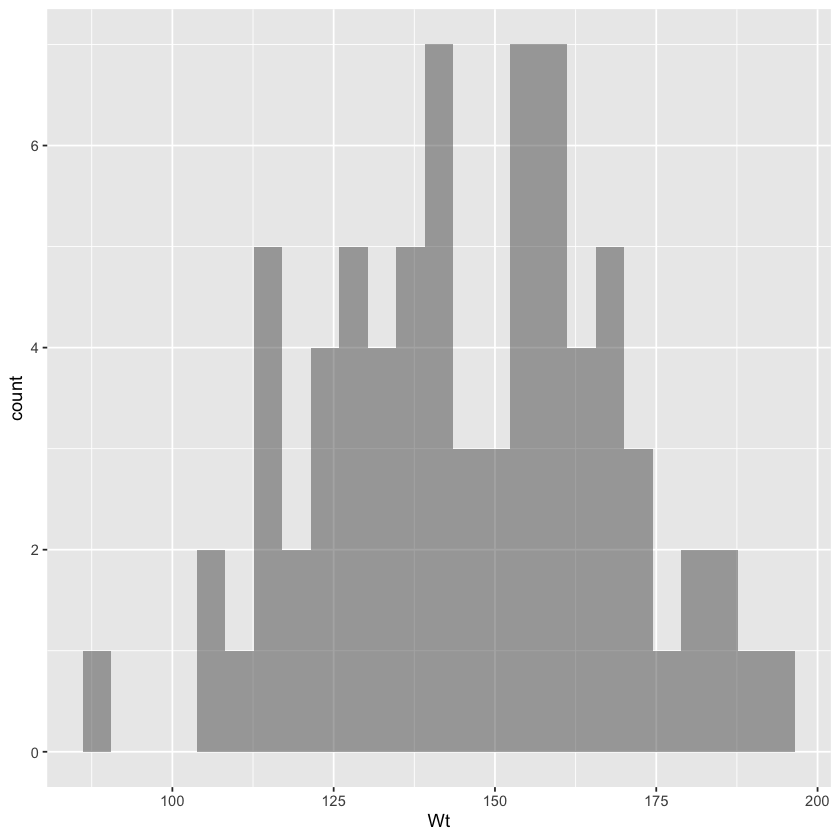

In [2]:
gf_histogram( ~ Wt, data=mindsetmatters)

```gf_formula``` takes two arguments. The first is a formula; notice that the variable we want to display, ```Wt```, is placed after a ~ symbol (tilde). The ~ works like an equal sign in the equation for a graph (e.g., ```y = mx + b``` from geometry class). So in R, whenever you put something before the ~, its values go on the y-axis and whenever you put something after the ~, its values go on the x-axis. A histogram is a special case where the y-axis is just a count related to the variable on the x-axis, not a different variable. Thus, the first argument in ```gf_formula``` is the formula ``` ~ Wt```, which tells R "plot the variable Wt on the x-axis."

The second argument is ```data=mindsetmatters```, which tells R which dataframe to find ```Wt``` in. 

Say we wanted to change the histogram to one that plots the variable ```Age```. Rewrite the code below to do so.

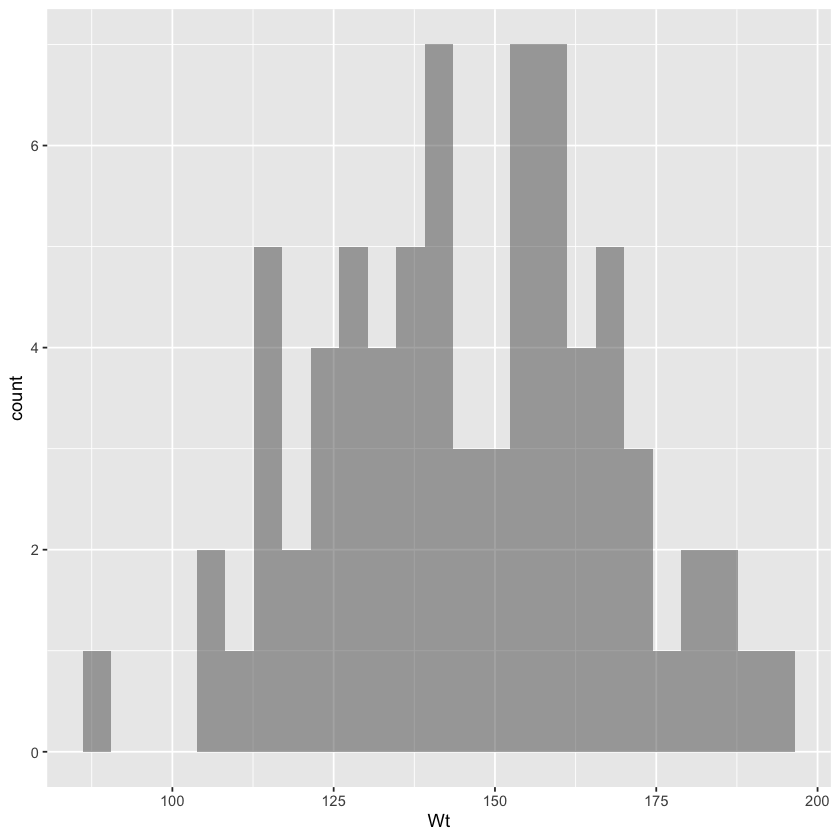

In [3]:
#Change the plotted variable to Age
gf_histogram(~ Wt, data=mindsetmatters)

Because the variable on the x-axis is often measured on a continuous scale, the bars in the histograms usually represent a range of values, called bins. We’ll illustrate this idea of bins by creating a simple outcome variable called ```outcome```, and displaying it on a histogram.

In [4]:
outcome <- c(1,2,3,4,5)
tiny_data <- data.frame(outcome=outcome) #gf_histogram only works on dataframe objects, not vectors
#Write some code below here to plot a histogram of the variable "outcome" in the dataframe "tiny_data"


This histogram shows gaps between the bars because by default ```gf_histogram()``` sets up 30 bins, even though we only have five possible numbers in our variable. If we change the number of bins to 5, then we’ll get rid of the gaps between the bars. To do this, we add in a new argument that gf_histogram can accept: ```bins```. 

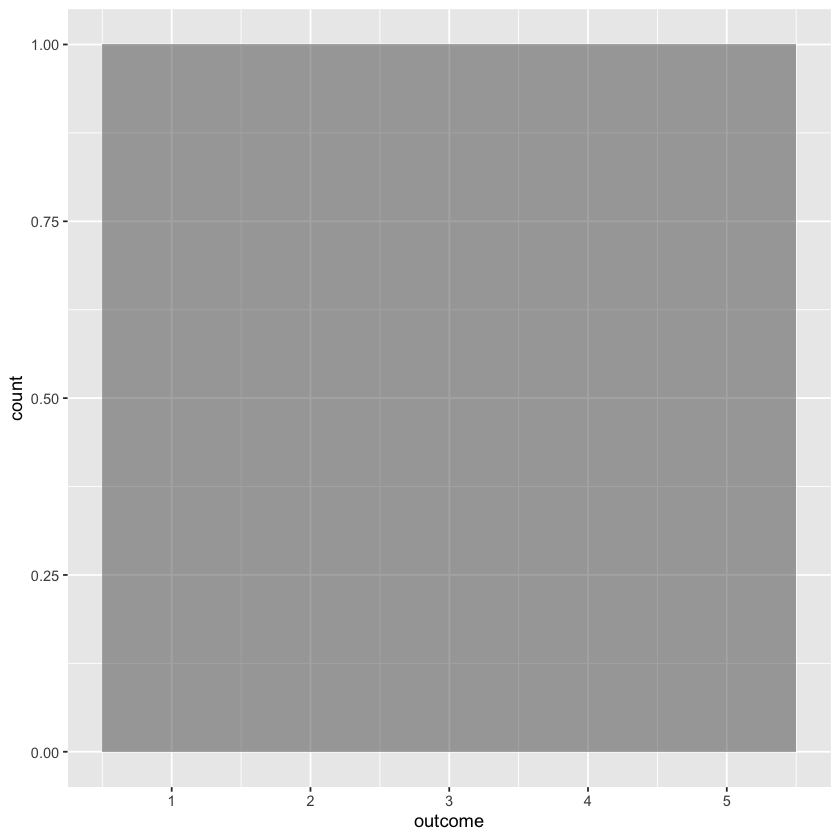

In [5]:
gf_histogram(~ outcome, data=tiny_data, bins=5)

Now we only have one bin per data value. However, since there are exactly one of each type of value, this histogram looks like a rectangle. To help distinguish things more, we can change the colors of the histogram, adding in the arguments ```color``` and ```fill```. What do you think each of these arguments does?

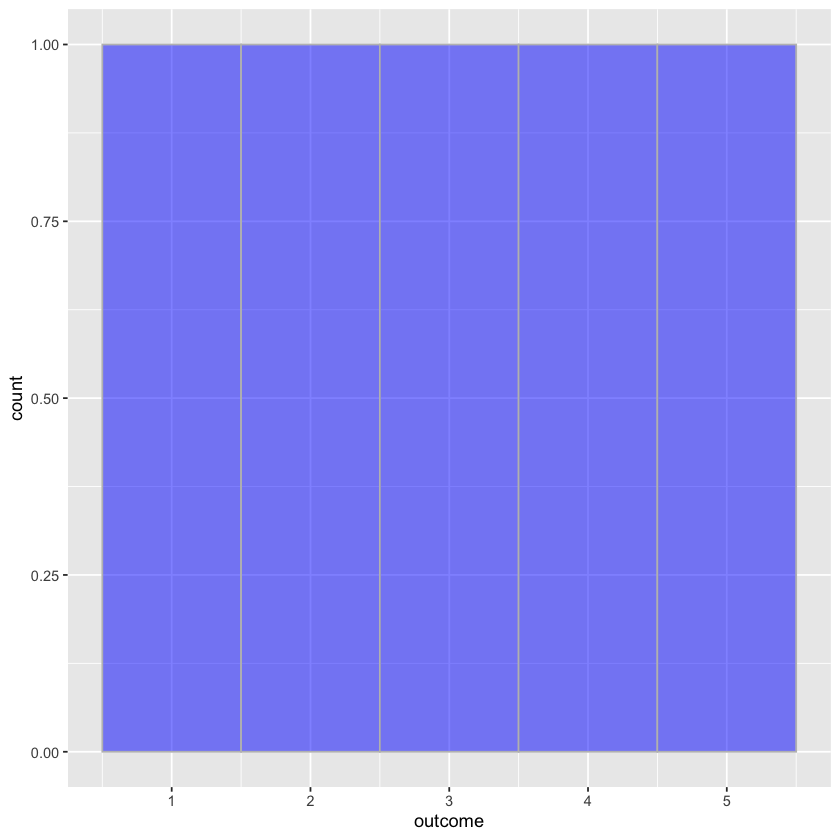

In [6]:
gf_histogram(~ outcome, data=tiny_data, bins=5, color="gray", fill="blue")

In chapter 8, we'll talk much more about how to tweak the details of our data visualizations.

Now try running the following code:

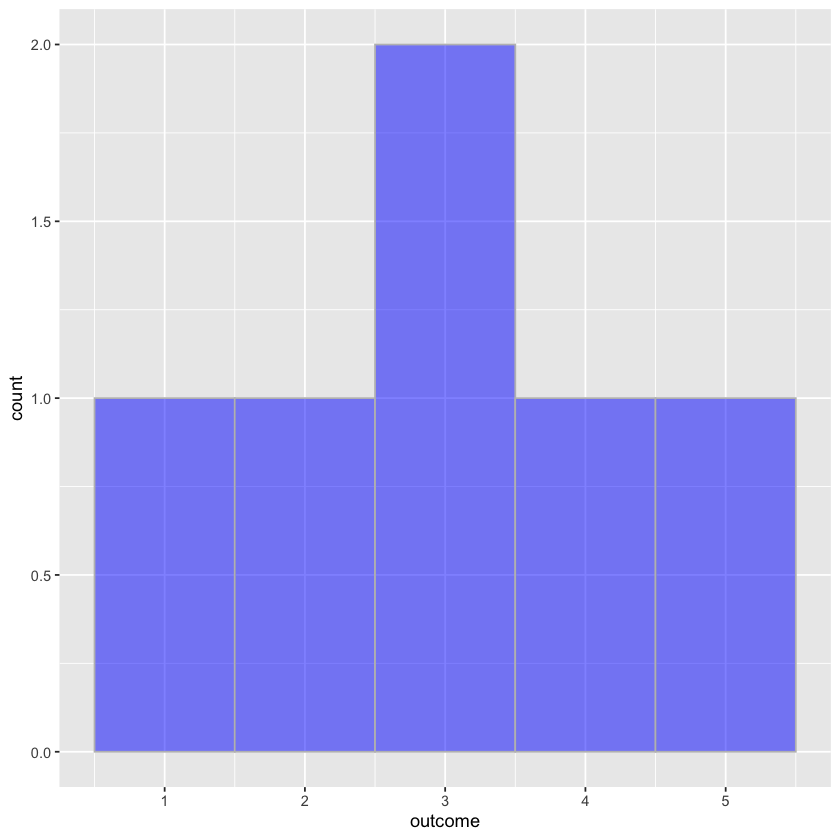

In [7]:
# This is the same code as before but we added in another outcome value, 3.2
outcome <- c(1, 2, 3, 4, 5, 3.2)
tiny_data <- data.frame(outcome=outcome)

# This makes a histogram with 5 bins
gf_histogram(~ outcome, data=tiny_data, bins=5, color="gray", fill="blue")

If you look closely at the x-axis, you’ll see that the bin for 3 actually goes from 2.5 to 3.5. Because of this, there are new two values that fall in the 2.5-3.5 bin: 3 and 3.2. 

### Density plots
**Density plots** are a lot like histograms, except on the y-axis is the *proportion* (or percentage) of the data that falls into a bin, rather than the raw count number. The vocab we use for this is called **density**. The only real difference between a histogram and density plot is how the y-axis is represented.

The function ```gf_dhistogram``` will plot a density plot (note the d before the word histogram, to distinguish it from the regular histogram function). 

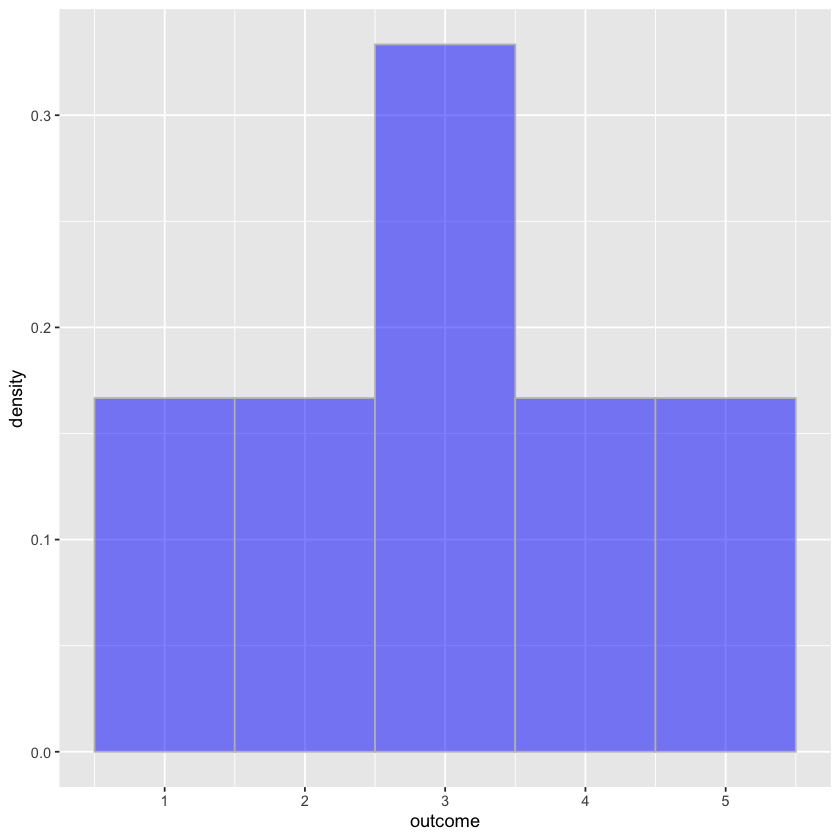

In [8]:
gf_dhistogram(~ outcome, data=tiny_data, bins=5, color="gray", fill="blue")

If everything worked right, the general shape of this plot should match the one above. The only difference is, the tallest bin now shows a density of 0.333 instead of 2, since 2 values out of 6 means 33% of the sample is in that bin.

In the window below, write some code to make a density plot of the ```Age``` variable in the ```mindsetmatters``` data.

In [9]:
#Finish the code below to make a density plot of Age in mindsetmatters
gf_dhistogram(#set formula here, #set dataframe here, #set bin and color options here)


ERROR: Error in parse(text = x, srcfile = src): <text>:4:0: unexpected end of input
2: gf_dhistogram(#set formula here, #set dataframe here, #set bin and color options here)
3: 
  ^


You may have gotten a warning by running this that said ```Warning message: Removed 1 rows containing non-finite values (stat_bin)```. Warnings in R mean your code can still run, but the program thinks something happened that you should pay attention to. In this case, there is one observation that has missing data in ```Age```. Since it's impossible to plot something that doesn't exist, this function ignored that row when plotting. Some functions are able to manage missing values this way, others will break completely with an error when you try to pass data with missing values. As you use R more you'll start getting a sense of which ones behave which way. 

In summary, the very first thing you should always do when analyzing data is to examine the distributions of your variables. If you skip this step, and go directly to the application of more complex statistical procedures, you do so at your own peril. Histograms are a key tool for examining distributions of variables. We will learn some others, too. But first, let’s see what we can learn from histograms.

What do we look for when we explore distributions of a variable? In general, we look for three things: shape, center, and variability.

## 5.3 Shape

Look back at the density plot you made for ```mindsetmatters$Age```, and take note of the general shape the whole dataset takes. Where is the peak of the the distribution? What are the most infrequent values? Statisticians describe the shapes of distributions using a few key features. Distributions can be **symmetrical**, or they can be **skewed**. A symmetrical distribution has a peak generally in the center of the x-axis, and the left side of the shape is close to a mirror image of the right side. If a distribution is skewed, it can be skewed left (the skinny longer tail is on the left, like someone stretched out that side) or skewed right (the skinny longer tail is on the right). 

It's rare to find a distribution perfectly symmetrical, but the more skewed something is the more we should take note of it. The distribution above has a slight skew to the right.

Other ways to talk about the shape of distributions include:
- **uniform**, meaning the number of observations is evenly distributed across the possible scores and there is no peak in the data (remember the rectangle histogram we made earlier?)  
- **unimodal**, meaning that there is one peak in the data 
- **bimodal** (or multimodal), having two (or more) clear peaks with only a few data values in between

Do you think the ```Age``` distribution above is uniform, unimodal, or bimodal?

You will often see distributions that match a particular shape and skewness. These special distribution types have names. For instance, the **normal** distribution is symmetric and unimodal, looking like a bell:

In [ ]:
normal_data <- rnorm(n=1000, mean=0, sd=1) #rnorm is a function that generates in a normal distribution;
# we'll talk about simulating data like this in a later chapter
gf_dhistogram(~ data_pts, data=data.frame(data_pts=normal_data))

Usually, distributions are kind of lumpy and jagged, so many of these features should be thought of with the word “roughly” in front of them. So even if a distribution doesn’t have exactly the same number of observations across all possible scores—but has roughly the same number—we could still call that distribution uniform. If you look at the density plot above, you might see some extra lumpiness along the sides of the bell curve. Some people might think this is a bimodal distribution. But statisticians would consider it roughly unimodal and roughly normal because the lumps are quite small compared to the main peak.

If a distribution is unimodal, it is often quite useful to notice where the center of the distribution lies. If lots of observations are clustered around the middle, then the value of that middle could be a handy summary of the sample of scores, letting you make statements such as, “Most of the data in this sample is around this middle value.”

## 5.4 Center

Speaking of the middle, it's often useful to be able to have a quantitative number to represent what that middle point is for a distribution. We mentioned in Chapter 2 that one of the big discoveries of statistics is the idea that we can better understand the world by throwing away information, and that’s exactly what we are doing when we summarize a dataset and describe its center value. So in most situations, after checking out the shape of the data distribution, the next thing that you’ll want to calculate is a measure of **central tendency**. That is, you’d like to know something about where the “average” or “typical” value of your data lies. The thre most commonly used measures are the mean, median, and mode.

### Mean
The **mean** of a set of observations is just an old-fashioned average: add all of the values up, and then divide by the total number of values. If a student's five exam scores were 76, 91, 86, 80 and 92, the mean of those scores would be:

$$\frac{76 + 91 + 86 + 80 + 93}{5} = 85.2$$

To calculate the mean in R, you could type out that exact formula above and have R work for you like a calculator: ```(76 + 91 + 86 + 80 + 93)/5```. However, that’s not the only way to do the calculation, and when the number of observations starts to become large, it’s easily the most tedious. Besides, in almost every real world scenario, you’ve already got the actual numbers stored in a variable of some kind, like ```test_scores <- c(76,91,86,80,93)```. Under those circumstances, you can use a combination of the ```sum()``` function and the ```length()``` function:

In [ ]:
test_scores <- c(76,91,86,80,93)
#This computes a mean
sum(test_scores) / length(test_scores)

```sum()```, rather obviously, computes the sum of a vector, while ```length()``` returns the length of a vector. Although it’s pretty easy to calculate the mean like this, we can do it in an even easier way. Since the mean is such a common metric to compute, R also provides us with the ```mean()``` function. Simply pass a vector to this fuction to return the mean. Try it in the code block below.

In [ ]:
#Use mean() to calculate the mean of test_scores

#Evaluate the code below. Do you think it will be true or false?
(sum(test_scores) / length(test_scores)) == mean(test_scores)

### Median
The mean is a really useful way of describing what the central tendency of a distribution is. However, sometimes it doesn't work as well as one might think. Imagine two distributions: ```dist1 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10)``` and ```dist2 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10, 100).``` Plot these as density plots below.

In [ ]:
dist1 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10)
dist2 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10, 100)

#Write code to plot the density plot of each of these distributions, using df_dhistogram()


While ```dist2``` has a value that is way out of the range of the others (called an *outlier*), most people would say a value that best represents the majority of the data is still around 10, like in ```dist1```. However, now calculate the mean of each distribution:

In [ ]:
#Calculate mean of dist1

#Calculate mean of dist2


The mean of ```dist2``` is way off of the mean of ```dist1```. This sort of situation is not uncommon - in fact, the mean of any distribution with appreciable skew will fall towards the long tail rather than at the peak of the rest of the data. In this case, a better measure of central tendency can be the **median**. 

The median is even easier to describe than the mean. The median of a set of observations is just the middle value, when the values are in numerical order. As before, let’s imagine we were interested in a student's five test scores. To figure out the median, we sort these numbers into ascending order, 76,80,**86**,91,93. The value in the middle, bolded here, is the median. 

It's easy to find the middle value in a set of numbers that are an odd-numbered length. But what should we do if ```test_scores``` had 6 values instead? E.g., 76,80,**86,91**,93,94. Now there are *two* middle numbers, 86 and 91. In this case, the median is defined as the average of these: 88.5. 

As before, it’s very tedious to do this by hand when you’ve got lots of numbers. Luckily in R, we have the ```median()``` function:

In [ ]:
median(test_scores)

### Mode
The last common measure of central tendency is the **mode**. This is the most frequent value within our data - what we've been calling the "peak" of a distribution. In a somewhat normal distribution, this is near the middle of the curve with the mean and median. But in a really weird distribution, where, say, the most extreme values are the most common, the mode could be way off. 

In [ ]:
#Visualize a weird distribution. Where is the mean versus the median versus the mode?
weird_dist <- data.frame(data_pts=c(1,2,2,3,3,3,4,4,4,4,5,5,5,5,5))
gf_dhistogram(~ data_pts, data=weird_dist)

You may have tried to use a function like ```mode()``` in the code block above to calculate the mode of the dataframe ```weird_dist```. However, in R ```mode()``` is already taken up by a different function - it returns the data mode of a vector. Given that the mode is the most frequent data value in a distribution, we can use the ```count()``` function from ```dplyr``` instead to list the number of data points with each unique value, and identify the mode that way:

In [ ]:
library(dplyr)
count(weird_dist, data_pts)

Because the mode can be far away from the middle of the value range in distributions like this, it may be better to think of the mode as more of a measure of "typicality" rather than a measure of "central tendency."

### Which measure of central tendency to use?
When do you pick between mean, median, and mode? There's no hard and fast rule - for each use case, you'll want to think about the message you're trying to send with your summary, as well as the nature of the underlying data. But here are some hints to help your decisions:

- As already mentioned, if you have a highly skewed distribution, median may be better than mean for describing the middle of the data.
- If your data are categorical, it doesn't make sense to calculate the mean or the median. Both the mean and the median rely on the idea that the numbers assigned to values are meaningful - i.e., can you say what the mean is of {apple, orange, banana, watermelon}? If data values aren't related numerically, it's best to use mode. 
- If your data are ordinal scale, you’re more likely to want to use the median than the mean. For instance, when measuring the typical number of children that an American household has, you can only have whole-numbered children. However, if we calculate the [average child number per family in 2020](https://www.statista.com/statistics/718084/average-number-of-own-children-per-family), we get 1.93. A partial amount of a child doesn't really make sense when discussing the typical number of children one might find in a household. Instead, it would make more sense to use the median: 2. 

## 5.5 Variability

Lastly we come to variability. Variability refers to how spread out (or wide) the distribution is. Saying most of our sample is around 60 means one thing if the range is from 50 to 70, and quite another if the range is from 2 to 200. This, too, has multiple measures we can use. 

### Range
The **range** of a variable is very simple: it’s the biggest value minus the smallest value. For ```test_scores``` data, the maximum value is 93, and the minimum value is 76. We can calculate these values in R using the ```max()``` and ```min()``` functions:

In [ ]:
#Max of test_scores
max(test_scores)

#Min of test_scores
min(test_scores)

#Calculate the range of test_scores by subtracting the min from the max


The other possibility is to use the ```range()``` function, which outputs both the minimum value and the maximum value in a vector, like this:

In [ ]:
range(test_scores)

Although the range is the simplest way to quantify the notion of variability, it’s one of the worst. Recall from our discussion of the mean that we want our summary measure to be robust (meaning it isn't affected by outliers very much). If the dataset has one or two extreme values in it, we’d like our statistics not to be unduly influenced by these cases. If we look once again at our toy example of a data set containing a very extreme outlier, ```dist2 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10, 100)```, it is clear that the range is not robust, since this has a range of 92. but if the outlier were removed, we would have a range of only 4.

### Interquartile range
The **interquartile range (IQR)** is like the range, but instead of calculating the difference between the biggest and smallest value, it calculates the difference between the 25th quantile and the 75th quantile. What is a quantile? 
the 25th quantile of a data set is the smallest number x such that 25% of the data is less than x. This is also called percentiles, which you may have heard before. 

In fact, we’ve already come across the idea: the median of a data set is its 50th quantile / percentile! R actually
provides you with a way of calculating quantiles, using the (surprise, surprise) ```quantile()``` function. Let’s
use it to calculate the median of ```Age``` in the ```mindsetmatters``` dataset:

In [ ]:
quantile(mindsetmatters$Age, probs=0.5, na.rm=TRUE)
median(mindsetmatters$Age, na.rm=TRUE)

<div class="alert alert-block alert-info">
<b>Note</b>: summary functions like quantile() and median() are some of those functions that break with NA values. To make it skip over them, add the argument "na.rm=TRUE". This turns a setting "should I remove NA values?" to TRUE.
</div>

Not surprisingly, The 50% quartile and the median agree. Now, we can actually input lots of quantiles at once, by specifying a vector for the probs argument. So lets do that, and get the 25th and 75th percentile:

In [ ]:
quantile(mindsetmatters$Age, probs = c(0.25,0.5,0.75), na.rm=TRUE)

Since the IQR is the 75th quartile minus the 25th quartile, our IQR is 45-29 = 16. As you might have suspected by now, R also gives us a way to calculate the IQR directly:

In [ ]:
IQR(mindsetmatters$Age, na.rm=TRUE)

The simplest way to think about IQR is that it contains the “middle half” of the data. That is, one quarter of the data falls below the 25th quartile, one quarter of the data is above the 75th quartile, leaving the “middle half” of the data lying in between the two. The IQR is the range covered by that middle half.

### Mean absolute deviation
The two measures we’ve looked at so far, the range and the interquartile range, both rely on the idea that we can measure the spread of the data by looking at the quantiles of the data. However, this isn’t the only way to think about the problem. A different approach is to select a meaningful reference point (usually the mean or the median) and then report the “typical” deviation from that reference point. What do we mean by “typical” deviation? Usually, the mean or median value of all points' deviations! In practice, this leads to two different measures, the **“mean absolute deviation (from the mean)”** and the **“median absolute deviation (from the median)”.** 

Since the previous paragraph might sound a little abstract, let’s go through the mean absolute deviation from the mean a little more slowly. One useful thing about this measure is that the name actually tells you exactly how to calculate it. Let’s think about our ```test_scores``` data, ```c(76,91,86,80,93)```. Since our calculations rely on an examination of the deviation from some reference point (in this case the mean), the first thing we need to calculate is the mean. In math, the mean of a variable X is often written as X with a horizontal line above it, so we'll use that here to help us write out our calculation. For the five observations of ```test_scores```, our mean is 

$$\bar{X} = 85.2$$

The next step is to convert each of our observations in X into a deviation score. We do this
by calculating the difference between the ith observation, X<sub>i</sub>, and the mean X¯. That is, the deviation score is defined to be 

$$X_i - \bar{X}$$

For the first observation in our sample, this is equal to 76 - 85.2 = -9.2. The next step in the process is to convert these deviations to absolute deviations, in order to get rid of that negative sign and say "how far away, in either direction, are we from the mean". Mathematically, we'd denote the absolute value as |-3| = 3. In R, we can use the ```abs()``` function: 

In [ ]:
#subtract the mean of test_scores from the first item in the vector, and find the absolute value
abs(test_scores[1] - mean(test_scores))

We repeat this process for every item in ```test_scores```. To make things easier, we've already done it for you and put it into a table:

| Which score   | Value        | Deviation from mean   | Absolute deviation     |
| :-----------: | :----------: | :-------------------: | :--------------------: |
| 1             | 76           | -9.2                  | 9.2                    |
| 2             | 91           | 5.8                   | 5.8                    |
| 3             | 86           | 0.8                   | 0.8                    |
| 4             | 80           | -5.2                  | 5.2                    |
| 5             | 93           | 7.8                   | 7.8                    |

Now that we have calculated the absolute deviation score for every observation in the dataset, all that we have to do now is calculate the mean of these scores. Let’s do that:

$$\frac{9.2 + 5.8 + 0.8 + 5.2 + 7.8}{5} = 5.76$$

And we’re done. The mean absolute deviation for these five scores is 5.76.

Here’s the formula that describes what we just calculated:

$$MAD(X) = \frac{1}{N}\sum_{i=1}^{N}|X_i-\bar{X}|$$

This just means that, for every item i in a dataset, we find the absolute deviation, sum all those deviations, and divide by the number of scores N. 

The last thing we need to talk about is how to calculate MAD in R. We can repeat every step of the calculations above:

In [ ]:
mean_scores <- mean(test_scores)       # step 1. the mean of the data
AD <- abs( test_scores - mean_scores ) # step 2. the absolute deviations from the mean
MAD <- mean(AD)                        # step 3. the mean of the absolute deviations
MAD


### Variance

Although the mean absolute deviation measure has its uses, it’s not the best measure of variability to use for a variety of mathematical reasons we don't need to get into. Instead, it's more common to use *squared* deviations
rather than *absolute* deviations. If we do that, we obtain a measure called the **variance**. We've used this word before to talk about the general concept of data varying, but here it is a specific measure with a specific formula. The variance of a data set X is sometimes written as Var(X), but it’s more commonly denoted s<sup>2</sup> (the reason for this will become clearer shortly). The formula that we use to calculate the variance of a set of observations is as follows:

$$Var(X) = \frac{1}{N-1}\sum_{i=1}^{N}|X_i-\bar{X}|^2$$

It is very similar to mean absolute deviation, except for two changes. Can you find in them in the equation? 

The first change is that the absolute deviation term is now squared. This has the effect of "penalizing" data with more variability - data points that are farther away from the mean contribute more to the variance score than data points closer to the mean. 

The second change is that we divide the whole think by N-1, instead of N. This may seem strange: the variance is supposed to be the mean squared deviation, right? So shouldn’t we be dividing by N, the actual number of observations
in the sample? As we'll discuss in a later chapter, there’s a subtle distinction between “describing some data” and “making guesses about the population from which the data came”. This difference turns into subtle changes for some measures like variance. For now, just take it on faith that we should use N-1 for calculating variance.

Calculating variance in R is really simple, since there is a built in function for the whole process: ```var()```.

In [ ]:
var(mindsjnetmatters$Age, na.rm=TRUE)

Now, what does the variance actually *mean*? Descriptive statistics are supposed to describe things, after all, and right now the variance is kind of a gibberish number. Unfortunately, the reason why we haven’t given you the human-friendly interpretation of the variance is that there really isn’t one. This is the most serious problem with the variance. Although it has some elegant mathematical properties that suggest that it really is a fundamental quantity for expressing variation, it’s completely useless if you want to communicate with an actual human... variances are uninterpretable in terms of the original variable! All the numbers have been squared, and they don’t have units anymore. What counts as low or high variance? What does it mean for Age to vary at a quantity of 119? These questions don't have good answers. However, because it is so ubiquitous in statistics at large, we still need to know how to calculate it. Basically, just know that higher variance means more data spread. 

### Standard deviation 
Suppose that you like the idea of using variance because of those nice mathematical properties which you totally trust us are real, but – since you’re a human and not a robot – you’d like to have a measure that is expressed in the same units as the data itself (i.e., years of age, not years-squared). What should you do? The solution to the problem is to take the square root of the variance, known as the **standard deviation,** also called the “root mean squared deviation”, or RMSD. This solves our problem fairly neatly: while nobody has a clue what “a variance of 119.16 age years-squared” really means, it’s much easier to understand “a standard deviation of 10.92 years old”, since it’s expressed in the original units. It is traditional to refer to the standard deviation of a sample of data as ```s```, though “sd” and “std dev” are also used at times. Because the standard deviation is equal to the square root of the variance, you probably won’t be surprised to see that the formula is:

$$s = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}|X_i-\bar{X}|^2}$$

and the R function to calculate it is ```sd()```.

In [ ]:
# Find the standard deviation of mindsetmatters$Age using sd(), and verify that it produces the same result 
# as the square root of var()
age_var <- var(mindsetmatters$Age, na.rm=TRUE)
age_sd <- sd( #type your code here )
sqrt(age_var) == age_sd

Interpreting standard deviations is slightly complex. Because the standard deviation is derived from the variance, and the variance is a quantity that has little to no meaning that makes sense to us humans, the standard deviation doesn’t have a simple interpretation. As a consequence, most of us just rely on a simple rule of thumb: in general, you should expect ~68% of the data to fall within 1 standard deviation away from the mean, ~95% of the data to fall within 2 standard deviations, and ~99.7% of the data to fall within 3 standard deviations. This rule tends to work pretty well most of the time, but it’s not exact: it’s actually calculated based on an assumption that the histogram is normally distributed. But even with skewed distributions, this rule is pretty close. 

### Which measure of variability to use?

We’ve discussed quite a few measures of spread (range, IQR, AAD, variance, and standard deviation), and hinted at their strengths and weaknesses. Here’s a quick summary:

- Range: Gives you the full spread of the data. It’s very vulnerable to outliers, and as a consequence it isn’t often used unless you have good reasons to care about the extremes in the data.
- Interquartile range: Tells you where the “middle half” of the data sits. It’s pretty robust, and complements the median nicely. This is used a lot.
- Mean absolute deviation: Tells you how far “on average” the observations are from the mean. It’s very interpretable, but has a few minor issues (not discussed here) that make it less attractive to statisticians than the standard deviation. Used sometimes, but not often.
- Variance: Tells you the average squared deviation from the mean. It’s mathematically elegant, and is probably the “right” way to describe variation around the mean, but it’s completely uninterpretable because it doesn’t use the same units as the data. Almost never used except as a mathematical tool; but it’s buried “under the hood” of a very large number of statistical tools.
- Standard deviation: This is the square root of the variance. It’s fairly elegant mathematically, and it’s expressed in the same units as the data so it can be interpreted pretty well. In situations where the mean is the measure of central tendency, this is the default. This is by far the most popular measure of variation.

## Chapter summary

After reading this chapter, you should be able to: 

- Define "distribution"
- Describe what shape, center, and spread refers to about a distribution
- Plot a distribution of data in R
- Visually identify modality and skewness in a distribution 
- Describe the differences between mean, median, and mode
- Describe the differences between range, interquartile range, mean absolute deviation, variance, and standard deviation

## Chapter quiz